In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
df_features =iris.feature_names

In [7]:
df_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df_target=pd.DataFrame(iris.target)

In [12]:
df = pd.DataFrame(iris.data, columns = df_features)
df_labels = pd.DataFrame(iris.target, columns = ['label'])

In [13]:
df_labels

,label
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [14]:
data = pd.concat([df, df_labels], axis=1)

In [15]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

In [17]:
X=data.drop('label',axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y=data['label']
y.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [19]:
X = X.to_numpy()

In [20]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
# number of samples / number of time steps chosen per sample , number of parallel time series or features

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [21]:
X.shape

(150, 4, 1)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values



from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [43]:
n_steps = X.shape[1]
n_steps

4

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [121]:
#Defining the model 

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils


def build_model(): 
    model = models.Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(GlobalAveragePooling1D())
    model.add(Flatten())
    model.add(Dense(40, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model

model = build_model() 
print("input_shape => ", n_steps, n_features)
model.summary()  

input_shape =>  4 1
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 3, 64)             192       
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 global_average_pooling1d_10  (None, 64)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 flatten_19 (Flatten)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 40)                2600      
                                                                 
 dense_39 (Dense)            (Non

In [122]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
4/4 [==============================] - 1s 40ms/step - loss: 0.6824 - accuracy: 0.3250 - val_loss: 0.6564 - val_accuracy: 0.3667
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6389 - accuracy: 0.3917 - val_loss: 0.6451 - val_accuracy: 0.2000
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6239 - accuracy: 0.3667 - val_loss: 0.6491 - val_accuracy: 0.2000
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6125 - accuracy: 0.3667 - val_loss: 0.6493 - val_accuracy: 0.2000
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6045 - accuracy: 0.3667 - val_loss: 0.6440 - val_accuracy: 0.2000
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5977 - accuracy: 0.3667 - val_loss: 0.6385 - val_accuracy: 0.2000
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5896 - accuracy: 0.3667 - val_loss: 0.6303 - val_accuracy: 0.2000
Epoch 8/100
4/4 [=======

4/4 [==============================] - 0s 11ms/step - loss: 0.2470 - accuracy: 0.9250 - val_loss: 0.2615 - val_accuracy: 0.8667
Epoch 60/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2443 - accuracy: 0.9250 - val_loss: 0.2607 - val_accuracy: 0.8333
Epoch 61/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2420 - accuracy: 0.9250 - val_loss: 0.2617 - val_accuracy: 0.7667
Epoch 62/100
4/4 [==============================] - 0s 12ms/step - loss: 0.2395 - accuracy: 0.9250 - val_loss: 0.2564 - val_accuracy: 0.8333
Epoch 63/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2369 - accuracy: 0.9250 - val_loss: 0.2547 - val_accuracy: 0.8333
Epoch 64/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2354 - accuracy: 0.9250 - val_loss: 0.2480 - val_accuracy: 0.8667
Epoch 65/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2329 - accuracy: 0.9333 - val_loss: 0.2453 - val_accuracy: 0.8667
Epoch 66/100
4/4 [=============

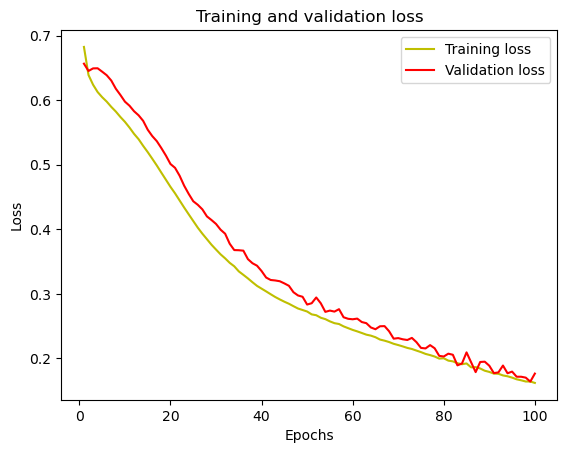

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

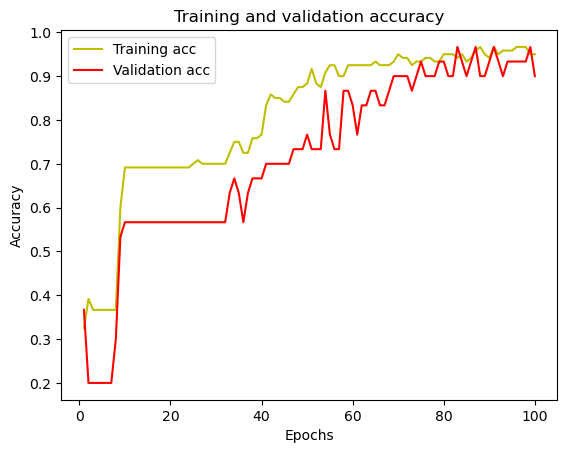

In [124]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [125]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30

[[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]
